# Банки — Сегментация пользователей по потреблению

**Задача исследования** — провести анализ клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов.

Необходимо:

- провести исследовательский анализ данных,
- сегментировать пользователей на основе данных о количестве потребляемых продуктов,
- проверить статистические гипотезы.
    

Ссылка на презентацию - https://drive.google.com/file/d/1CsBVSGeAYlj6WyG0jGvuv12P-5YR06ga/view?usp=sharing


## Загрузка и описание данных 

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import plotly.express as px 
from plotly import graph_objects as go
sns.set_palette('coolwarm')

In [ ]:
# читаем данные 

# url = "https://drive.google.com/file/....."
# df = pd.read_csv('https://drive.google.com/uc?id=' + url.split('/')[-2])

In [ ]:
# изучим датасет

print('Общая информация о наборе данных\n')
print('Размер таблицы: {}\n'.format(df.shape), '\n')
print('Количество пропусков: \n', df.isnull().sum(), '\n')
print('Тип данных: \n', df.dtypes, '\n')
display(df.sample(10, random_state=1))

Общая информация о наборе данных

Размер таблицы: (10000, 12)
 

Количество пропусков: 
 userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64 

Тип данных: 
 userid                int64
score                 int64
City                 object
Gender               object
Age                   int64
Objects               int64
Balance             float64
Products              int64
CreditCard            int64
Loyalty               int64
estimated_salary    float64
Churn                 int64
dtype: object 



,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
9953,15698688,550,Ярославль,М,47,2,NaN,2,1,1,97057.28,0
3850,15818029,680,Ярославль,М,34,3,143292.95,1,1,0,66526.01,0
4962,15707824,531,Ярославль,Ж,42,2,NaN,2,0,1,90537.47,0
3886,15763677,710,Ростов Великий,М,34,8,147833.30,2,0,1,1561.58,0
5437,15776212,543,Ростов Великий,М,30,6,73481.05,1,1,1,176692.65,0
8517,15714536,688,Ярославль,М,20,8,137624.40,2,1,1,197582.79,0
2041,15752582,840,Ярославль,Ж,39,1,94968.97,1,1,0,84487.62,0
1989,15665190,695,Рыбинск,М,28,0,96020.86,1,1,1,57992.49,0
1933,15858296,666,Ростов Великий,М,74,7,105102.50,1,1,1,46172.47,0
9984,15738911,602,Ростов Великий,М,35,7,90602.42,2,1,1,51695.41,0


In [ ]:
# переведем к нижнему регистру названия столбцов
df.columns = df.columns.str.lower()

In [ ]:
# посмотрим на распределение данных

for col in ['city', 'gender']:
  print(col, '\n')
  print(df[col].unique(), '\n')
  print(df[col].describe(), '\n')

print('Количество уникальных пользователей:', df['userid'].nunique(), '\n')
print('Распределение числовых данных:', '\n')
df.describe()

city 

['Ярославль' 'Рыбинск' 'Ростов Великий'] 

count         10000
unique            3
top       Ярославль
freq           5014
Name: city, dtype: object 

gender 

['Ж' 'М'] 

count     10000
unique        2
top           М
freq       5457
Name: gender, dtype: object 

Количество уникальных пользователей: 10000 

Распределение числовых данных: 



,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# проверим на наличие неполных дубликатов по избранным столбцам
print('Количество дубликатов в датасете:', len(
    df[df.duplicated(subset=['score', 'age', 'balance', 'products', 'creditcard', 
                             'objects', 'gender', 'estimated_salary'])]))


Количество дубликатов в датасете: 0


ВЫВОДЫ

В датасете содержится информация о 10 000 уникальных клиентах банка, проживающих в Ярославле, Рыбинске, Ростове Великом. 
Каждому клиенту присвоен уникальный идентификатор (userid), имеется информация:
- `score` — баллы кредитного скоринга: от 350 до 850, среднее - 651,
- `city` — город,
- `gender` — пол,
- `age` — возраст: от 18 до 92 лет, среднее - 39, 
- `objects` — количество объектов в собственности: от 0 до 10, в среднем - 5, 
- `balance` — баланс на счёте: от 3 768.7 до 250 898.1 руб, среднее - 119 827.5 руб,
- `products` — количество продуктов, которыми пользуется клиент: от 1 до 4, в среднем - 1,
- `creditcard` — есть ли кредитная карта: в 71% случаев есть,
- `loyalty` — активный клиент: да в 51.5% случаев, 
- `estimated_salary` — заработная плата клиента (оценивается алгоритмом): от 11.58 до 199 992 руб, 
- `churn` — ушёл или нет: средний показатель оттока - 20.4%

Типы данных соответствуют описанию переменных, дубликатов в датасете нет.

Пропуски имеются в данных о балансе на счете (balance) в количестве 3617 значений. Заполнение не будет проводиться, т.к. может привести к значительному искажению данных. 
- можно провести кампанию по вовлечению клиентов с балансов, близким к 0: предложить бонусную систему, кэшбек и тп.
- пустой счет (пропуски) может означать, что у клиентов нет дебетовой карты (например, был взят только кредит). Поэтому трата денег на вовлечение таких клиентов не рациоальна.

## Исследовательский анализ данных 

### активность клиентов и вероятность их ухода в разрезе городов


In [ ]:
# посмотрим подробнее на географию проживания и активность клиентов банка 

city_gr = df.groupby('city', as_index=False).agg({'userid': 'count',
                                                  'loyalty' : 'mean',
                                                  'churn' : 'mean', 
                                                  'balance' : 'median',
                                                  'estimated_salary': 'median'})

# доля клиентов каждого города среди клиентов банка
city_gr['part(%)_of_full_users'] = (city_gr['userid'] / len(df) * 100).round(2)

# добавим информацию о численности городов 
# информация актуальная на 01.01.2021, источник - Википедия
city_gr['population'] = [30406, 182383, 601403]

# оценим проникновение банка в каждом городе
city_gr['part(%)_of_full_population'] = (city_gr['userid'] / city_gr['population'] * 100).round(2)



city_gr

,city,userid,loyalty,churn,balance,estimated_salary,part(%)_of_full_users,population,part(%)_of_full_population
0,Ростов Великий,2509,0.497409,0.324432,119703.100,102397.22,25.09,30406,8.25
1,Рыбинск,2477,0.529673,0.166734,119726.450,99984.86,24.77,182383,1.36
2,Ярославль,5014,0.516753,0.161548,120135.155,99132.31,50.14,601403,0.83


Половина клиентов исследуемой выборки проживают в Ярославле. Примерно в равных пропорциях (по 25%) распределено между Рыбинском и Ростовом Великим. Однако, если учитывать численность этих городов, чаще всего клиентами банка становятся в Ростове (8,25% от численности населения), в то время как в Рыбинске и Ярославле доля клиентов среди населения невелика: 1.36% и 0.83%, соответственно.

Активность клиентов во всех городах соизмерима и колеблется в районе 50%: в Рыбинске - 53%, в Ярославле - 51.7%, в Ростове Великом - 49.7%.

Отток клиентов больше всего наблюдается в Ростове (32,4%), в то время как Рыбинске и Ярославле показатели ниже в 2 раза: 16.7% и 16.2%, соответсвенно.

**Из полученных данных можно сделать предположения:**
- половина клиентов банка не являются активными пользователями продуктов, что может привести к их потере (оттоку), если с ними не рабоотать.  *возможное решение - направить пуш-уведомление о новостях/ предложениях и акциях банка/ скидках от партнеров и тд*

- высокая доля распространения в Ростове может быть обусловлена использованием продукта или специального предложения банка, актуального для данного города. Например, это может быть зарплатный проект градообразующего предприятия или маркетинговая акция "приведи друга". При этом, доля оттока выше в два раза, чем в Рыбинске или Ярославле. *Стоит проработать вопрос удержания клиентов. Проверить, связан ли отток с окончанием спец.предложения или периодом льготного обслуживания - в качестве решения можно предложить клиентам особые условия для продолжения сотрудничества. Либо провести пользовательское исследование по сбору обратной связи о причинах ухода*

### зависимость использования продуктов банка между возрастными группами

In [ ]:
# распределим клиентов на 4 возрастные группы 

age_labels = ['до 25', '25 - 39', '40 - 64', 'от 65']
cut_bins = [df.age.min(), 24, 39, 64, df.age.max()]

# и добавим информацию в новый столбец исходной таблицы

df['age_range'] = pd.cut(df['age'],
                       bins=cut_bins,
                       labels=age_labels)
df.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_range
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,40 - 64
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,40 - 64
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,40 - 64
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,25 - 39
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,40 - 64


In [ ]:
# сгруппируем по возрасту и посмотрим на средние показатели по группам

age_gr = df.groupby('age_range', as_index=False).agg({'userid': 'count',
                                                      'products' : 'median',
                                                      'balance' : 'median',
                                                      'estimated_salary' : 'median',
                                                  'loyalty' : 'mean',
                                                  'creditcard' : 'mean',
                                                  'churn' : 'mean'})
# доля клиентов по группам среди клиентов банка
age_gr['part(%)_of_full_users'] = (age_gr['userid'] / len(df) * 100).round(1)

age_gr

,age_range,userid,products,balance,estimated_salary,loyalty,creditcard,churn,part(%)_of_full_users
0,до 25,435,2.0,118372.75,106663.46,0.519540,0.694253,0.087356,4.4
1,25 - 39,5530,2.0,120268.13,98314.77,0.502532,0.713924,0.100723,55.3
2,40 - 64,3731,1.0,119501.88,101491.23,0.506299,0.694184,0.374430,37.3
3,от 65,282,1.0,119785.47,103564.02,0.865248,0.712766,0.152482,2.8


In [ ]:

# визуализируем распределение  
fig = go.Figure(data=[go.Pie(
    labels=age_gr['age_range'], 
    values=age_gr['userid'], 
    hole=0.8)])
fig.update_layout(
    title="Распределение клиентов между возрастными группами")
fig.show()

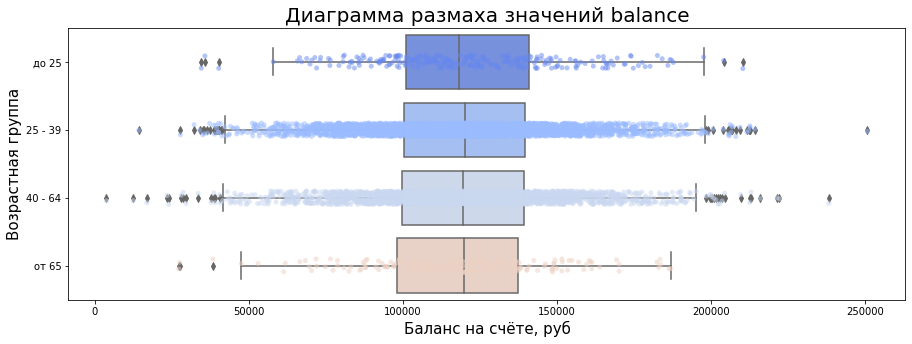

In [ ]:
# визуализируем данные с помощью диаграмм размаха
# напишем функцию:на вход передадим датафрейм, категории (у) и серию значений (х), подписи осей

def boxplot(data, col, category, xlabel, ylabel):

  plt.figure(figsize=(15,5))
  plt.title('Диаграмма размаха значений ' + col, fontsize = 20)
  sns.stripplot(y=category, x=col, data=data, alpha=0.5) 
  sns.boxplot(y=category, x=col, data=data)
  plt.xlabel(xlabel, fontsize = 15)
  plt.ylabel(ylabel, fontsize = 15)
  plt.show() 

boxplot(df, 'balance', 'age_range', "Баланс на счёте, руб", "Возрастная группа")

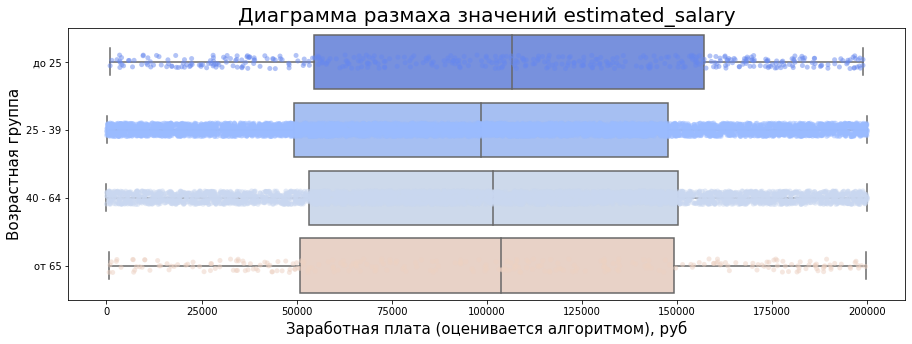

In [ ]:
boxplot(df, 'estimated_salary', 'age_range', "Заработная плата (оценивается алгоритмом), руб", "Возрастная группа")

По большей части клиенты банка - это люди молодого и среднего возраста - теаретически, это активное работающее население. На долю клиентов от 25 до 40 лет приходится 55.3%, от 40 до 65 лет - 37.3%.

Наименее охваченные сегменты:
- клиенты студенческого возраста (от 18 до 25) - 435 (4.4%)
- клиенты пенсионного возраста (старше 65 лет) - 282 (2.8%)

Люди молодого возраста (до 40 лет) чаще пользуются несколькими продуктами банка (медианное значение = 2), а среднего и старшего - одним.

Активность клиентов в группах до 65 лет сопоставима (около 50%), а вот клиенты от 65 лет (неожиданно) стали самыми активными пользователями - 86.5%. Если причина в особых условиях обслуживания пенсионеров, то акцию можно считать успешной.

Отток клиентов минимален для клиентов студенческого (8.7%) и молодого возраста до 40 лет (10%). Максимальный показатель в группе от 40 до 65 - 37.4%. *На эту каегорию клиентов необходимо обратить особое внимание. Провести интервью, выявить зоны недовольства банком и причины ухода.* Доля оттока в сегменте 65+ относительно небольшая - 15.2%.

Баланс на счете во всех возрастных группах достаточно высок - около 120 тыс.руб. Для распределения значений баланса на счете для групп 25-39, 40-64 (они же - наиболее многочисленные) наблюдаются выбросы как в меньшую, так и в большую стороны. Таким клиентам можно предлагать либо кредитные программы, либо инвестиционные, соответственно.

Рассчитанное значение заработной платы выше всего в категории клиентов 18-25 лет (106 663 руб). При этом распределения во всех возрастных категориях очень равномерное и находится в одном диапазоне приблизительно от 0 до 200 тыс.руб

**Рекомендации:**
- разработать продукты для охвата потенциальных клиентов до 18 лет (детские карты, доп.карты к счетам родителей и тп)
- разработать программы для студентов и пенсионеров. Сейчас доля этих возрастных категорий в общем портфеле очень мала, при этом лояльность этих категорий велика - это потенциальная точка роста.
- разработать премиальные программы: среднее значение баланса на счете во всех категориях одинакова. При этом отток среди клиентов 40-64 лет высок (37.4%) - возможно, этой категории людей становятся не интересны стандартные продукты и подходы банка.
- в зависимости от баланса на счете и активности клиента можно предлагать кредитные или инвестиционные продукты




### исследование корреляционных зависимостей 

* есть ли зависимость между имеющимися показателями благосостояния (заработная плата, баланс на счете, количество объектов недвижимости, количество используемых продуктов) и вероятностью ухода


In [ ]:
# создадим на базе df новый датафрейм, где оставим только признаки 

df_property = df.drop(columns=['userid', 'age_range'], axis=1)

print('Размер df_property:', df_property.shape)
df_property.head()

Размер df_property: (10000, 11)


,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


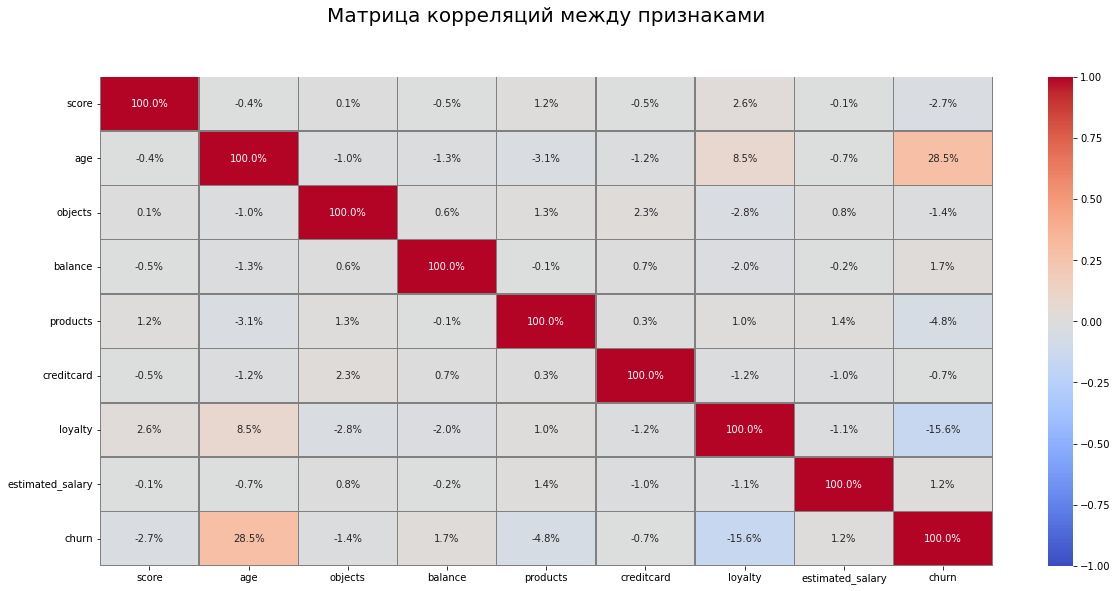

In [ ]:
# построим тепловую карту для матрицы корреляций

cm = df_property.corr() 
plt.figure(figsize=(20, 9))
plt.title('Матрица корреляций между признаками', fontsize = 20, y=1.1)
sns.heatmap(cm, annot=True, fmt='.1%', vmin=-1, vmax=1, center= 0,
            linewidths=0.4, linecolor='grey', cmap="coolwarm") 
plt.show()



**Выводы**

Согласно корреляционной матрице, **на отток влияет (слабо) только возраст клиентов**.Остальные признаки не коррелируют (линейно) между собой

•	Влияет ли уровень заработной платы на решение клиента использовать кредитную карту? Можно ли на основании исследования выявить группу клиентов, которым может быть интересно предложение о кредитной карте или зарплатном проекте?

In [ ]:
# для большей читабельности грфиков в df_property заменим значения 0 и 1 на нет и да, соответственно

dict = {0 : 'нет', 1 : 'да'}
df_property['creditcard_dict']= df_property['creditcard'].map(dict)
df_property['loyalty_dict']= df_property['creditcard'].map(dict)
df_property['churn_dict']= df_property['creditcard'].map(dict)
df_property.head(2)

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,creditcard_dict,loyalty_dict,churn_dict
0,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,да,да,да
1,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,нет,нет,нет


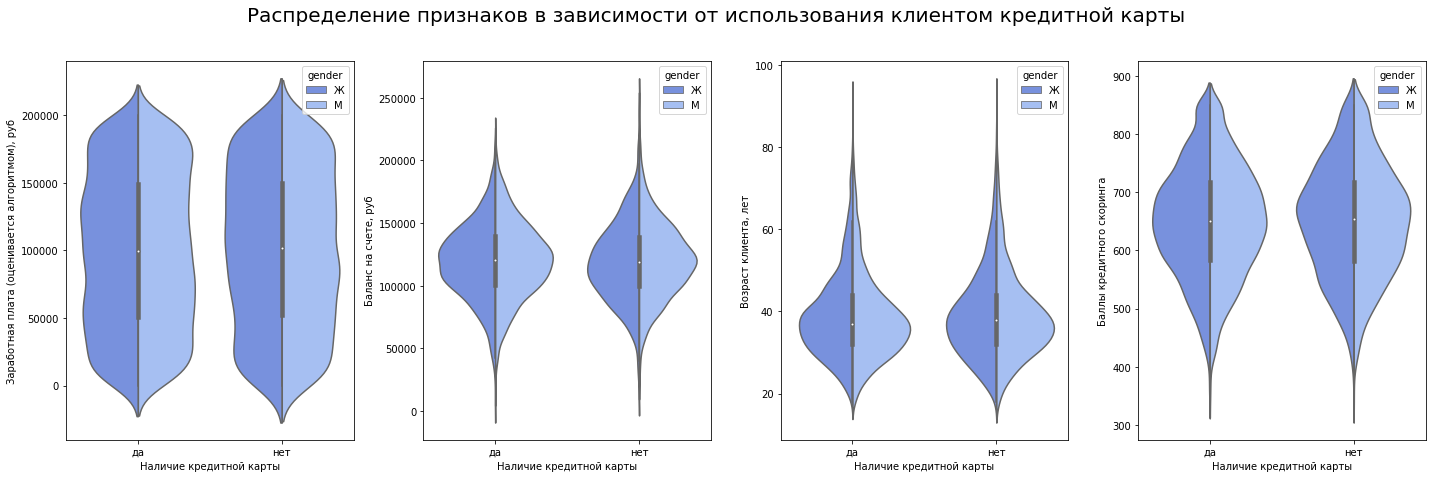

In [ ]:
# построим распределения признаков в зависимости от использования клиентом кредитной карты (с разделением по генденрному признаку)
# оформим в виде функции

def subplot(arg, hue, title, xlabel):
  fig = plt.figure(figsize=(20, 6))
  gs = fig.add_gridspec(1, 4)

  ax = fig.add_subplot(gs[0, 0])

  sns.violinplot(x=arg, y="estimated_salary", data=df_property, hue=hue, split=True)
  ax.set_xlabel(xlabel)
  ax.set_ylabel("Заработная плата (оценивается алгоритмом), руб")

  ax = fig.add_subplot(gs[0, 1])
  sns.violinplot(x=arg, y="balance", data=df_property, hue=hue, split=True)
  ax.set_xlabel(xlabel)
  ax.set_ylabel("Баланс на счете, руб")


  ax = fig.add_subplot(gs[0, 2])
  sns.violinplot(x=arg, y="age", data=df_property, hue=hue, split=True)
  ax.set_xlabel(xlabel)
  ax.set_ylabel("Возраст клиента, лет")

  ax = fig.add_subplot(gs[0, 3])
  sns.violinplot(x=arg, y="score", data=df_property, hue=hue, split=True)
  ax.set_xlabel(xlabel)
  ax.set_ylabel("Баллы кредитного скоринга")

  fig.tight_layout()
  fig.suptitle(title, fontsize=20, y=1.1)
  plt.show()


subplot("creditcard_dict", "gender", 
        "Распределение признаков в зависимости от использования клиентом кредитной карты", "Наличие кредитной карты")

In [ ]:
# сводная таблица изучаемых признаков

df_property.groupby(['creditcard_dict', 'gender']).median().round(3).drop(['creditcard', 'churn', 'loyalty'], axis=1)

score   age  ...  products  estimated_salary
creditcard_dict gender               ...                            
да              Ж       651.0  38.0  ...       1.0        100736.375
                М       651.0  37.0  ...       1.0         97877.920
нет             Ж       656.0  38.0  ...       1.0        104617.990
                М       652.0  37.0  ...       1.0         98660.145

[4 rows x 6 columns]

In [ ]:
df_cc = df_property.groupby(['creditcard_dict', 'gender']).agg({
    'score':'count',
    'churn':'mean',
    'loyalty':'mean'
})
df_cc = df_cc.rename(columns={'score': 'count'})
df_cc['part_of_all'] = df_cc['count']/len(df)
df_cc

count     churn   loyalty  part_of_all
creditcard_dict gender                                        
да              Ж        3192  0.249060  0.497180       0.3192
                М        3863  0.162827  0.522910       0.3863
нет             Ж        1351  0.254626  0.515914       0.1351
                М        1594  0.168758  0.531368       0.1594

**Выводы:**

Большая часть клиентов (71%) имеют кредитные карты. Распределение между полами соизмеримо, однако, мужины используют кредитные средства чуть чаще (39% против 32%).

Не выявлено значимых различий и аномалий в распределении признаков (зп, баланс, возраст, баллы кредитного скоринга) в зависимости от наличия кредитной карты ни у мужчин, ни у женщин.

Показатели оттока и активности клиентов также не зависят от наличия кредитной карты или пола клиента.

**Поэтому, можно говорить о том, что уровень заработной платы не влияет на решение клиента использовать кредитную карту: предложение о кредитной карте в равной степени может быть интересно для всех групп клиентов. Наличие кредитной карты не влияет на средние показатели оттока и активности.** 

* Зависит ли решение клиента уйти от уровня остатка на балансе?

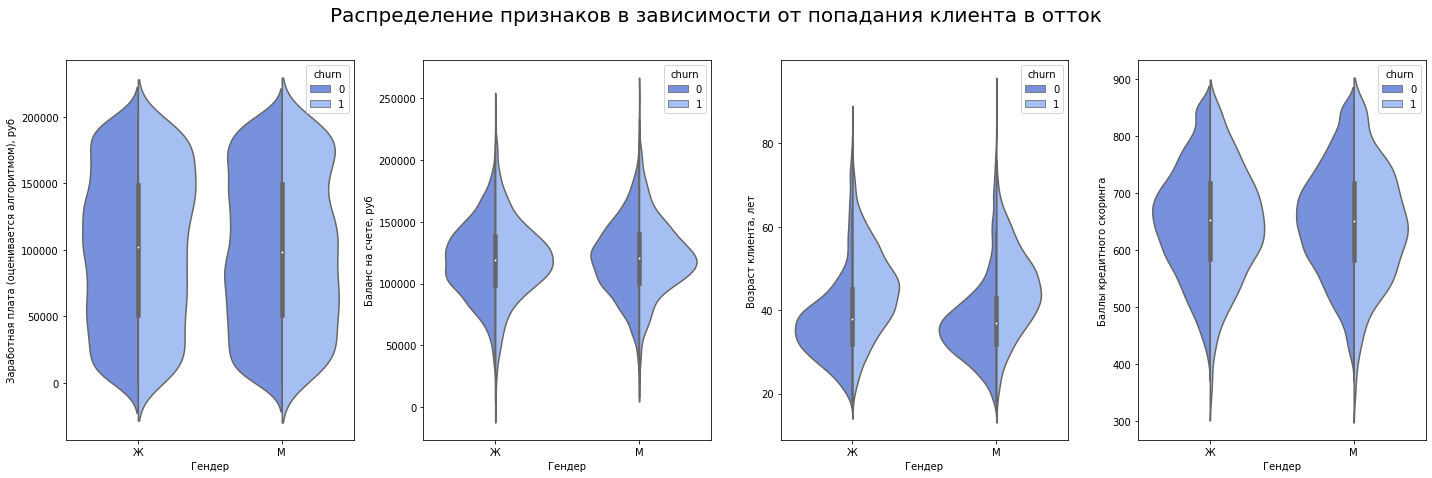

In [ ]:
subplot("gender", "churn", 
        "Распределение признаков в зависимости от попадания клиента в отток", "Гендер")

In [ ]:
# гистограммы распределения признаков с учетом оттока

for col in ['balance', 'estimated_salary']:
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df.query('churn == 0')[col], name='клиенты банка'))
    fig.add_trace(go.Histogram(x=df.query('churn == 1')[col], name='отток'))
    fig.update_layout(
        title="Распределение клиентов по " + col,
        title_x = 0.5,
        xaxis_title=col,
        yaxis_title="Количество клиентов")
        

    fig.show()

## 3.	Сегментация клиентов

### по количеству продуктов

в разрезе городов

In [ ]:
segment_geo = df.pivot_table(
    index='products', columns='city', values='userid', aggfunc='count', margins=True, margins_name='All')
segment_geo.reset_index()
segment_geo['part_of_all%'] = (segment_geo['All'] / len(df) * 100).round(1)
segment_geo

city,Ростов Великий,Рыбинск,Ярославль,All,part_of_all%
products,,,,,
1,1349,1221,2514,5084,50.8
2,1040,1183,2367,4590,45.9
3,96,66,104,266,2.7
4,24,7,29,60,0.6
All,2509,2477,5014,10000,100.0


**Выводы**

**Сегменты клиентов, использующих 1 или 2 продукта.** Распределение между сегменами сопоставимо, однако, во всех исследуемых городах одним продуктом пользуются чуть чаще, чем двумя: 50.8% приходится на 1 сегмент, 45.9% - на 2. 

В целом, распределение клиентов в сегментах пропорционально общему количеству клиентов в городах. 

**Сегменты клиентов, использующих 3 или 4 продукта.** Доли сегментов составляют 2.7% и 0.6%, соответственно.

Количество клиентов, в портфеле которых есть 3 или 4 продукта банка в Ростове Велком и Ярославле сопоставимо, несмотря на то, что общее количество клиентов в Ярославле в 2 раза больше. Это может говорить о принадлежности клиентов к одному экономическому классу (что нивелирует географический признак).

### вероятность ухода

Рассчитать вероятность ухода в каждом из сегментов

In [ ]:
# рассчитаем вероятность ухода в разрезе по сегментам (в %)
segment_churn = df.pivot_table(
    index='products', values='churn', aggfunc='mean') 
segment_churn['churn_%'] = (segment_churn['churn'] * 100).round(2)

# добавим информацию о тех, кто остался, чтобы визуализировать результат
segment_churn['not_churn_%'] = 100 - segment_churn['churn_%']
segment_churn = segment_churn[['churn_%', 'not_churn_%']]
segment_churn

,churn_%,not_churn_%
products,,
1,27.71,72.29
2,7.58,92.42
3,82.71,17.29
4,100.00,0.00


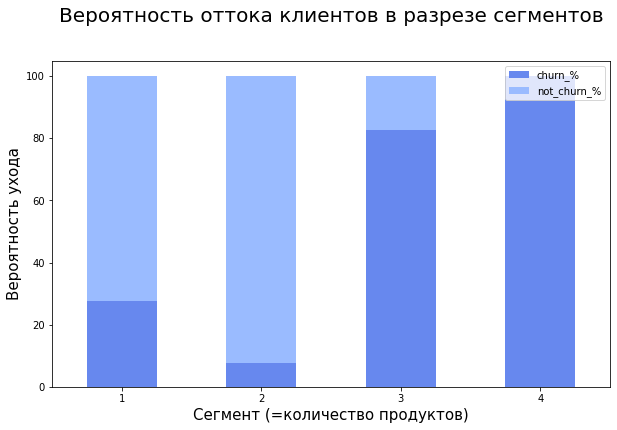

In [ ]:
# визуализируем 

segment_churn.plot(
    figsize=(10, 6),
    kind='bar', stacked=True
    )
plt.title("Вероятность оттока клиентов в разрезе сегментов", fontsize=20, y=1.1)
plt.xlabel("Сегмент (=количество продуктов)", fontsize = 15)
plt.ylabel("Вероятность ухода", fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

Выводы

Самые многочисленные сегменты, 1 и 2, при этом самые надежные: вероятность оттока 27.7% и 7.6%, соответственно. Учитывая сопоставимость абсолютных показателей объемов сегментов, **рекомендуется** активнее предлагать второй продукт клиентам - так вероятность оттока снижается почти в 4 раза.

82.7% клиентов 3 сегмента покинули банк, а из 4 сегмента "ушли" в 100% случаев. Возможно, учитывая небольшую выборку, это является статистической погрешностью. Либо стоит провести аудит условий для данных сегментов, сравнить с условиями конкурентов.

### уровень доходов 

Определить степень корреляции между уровнем благосостояния (доход, остаток на балансе, количество объектов недвижимости) и сегментом (количеством используемых продуктов). Какие аномалии, закономерности можно заметить? Какие предложения для удержания можно предложить исходя из данных о клиентах?

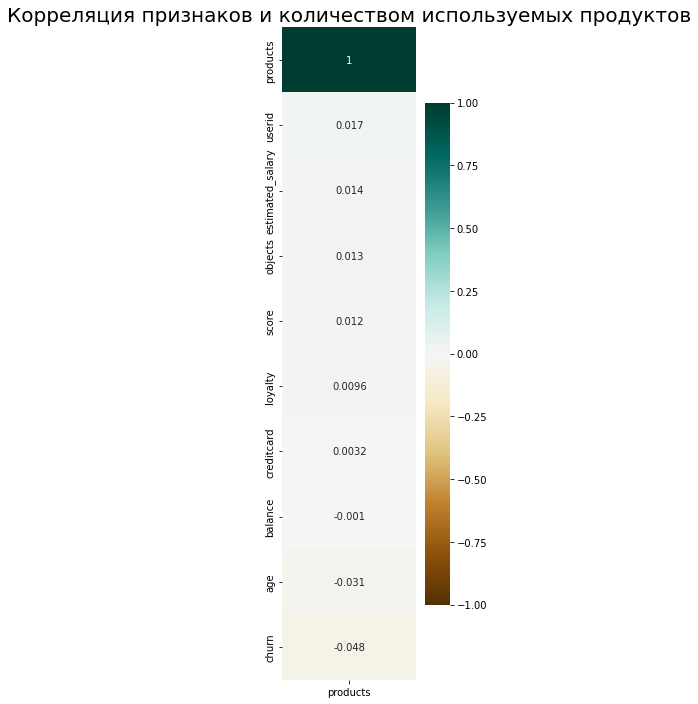

In [ ]:
# построим еще раз корреляционную матрицу, оставив лишь 1 признак - сегмент (=количество продуктов)

plt.figure(figsize=(3, 12))
sns.heatmap(df.corr()[['products']].sort_values(by='products', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title("Корреляция признаков и количеством используемых продуктов", fontsize=20)
plt.show()

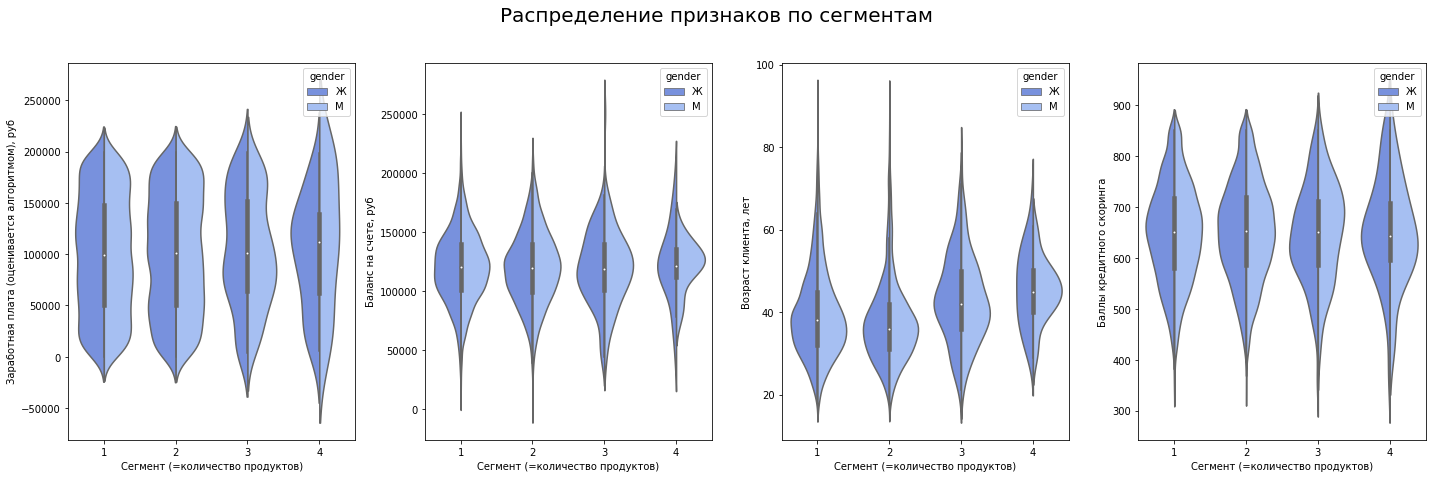

In [ ]:
#визуализируем распредение признаков дохода в разрезе сегментов

subplot("products", "gender", 
        "Распределение признаков по сегментам", "Сегмент (=количество продуктов)")

In [ ]:
# рассчитаем средние (медианные) значения исследуемых величин

df.groupby('products').agg({'estimated_salary': 'median', 
                      'balance': 'median',
                      'age': 'median',
                      'loyalty' : 'mean',
                      'score': 'median',  
                      'objects':'mean'
}
)


,estimated_salary,balance,age,loyalty,score,objects
products,,,,,,
1,99226.830,119919.120,38.0,0.504131,651.0,4.974626
2,100738.855,119762.245,36.0,0.532898,653.0,5.051852
3,101046.885,118118.190,42.0,0.424812,650.0,5.003759
4,112163.105,120968.270,45.0,0.483333,643.0,5.300000


**Выводы**

Таким образом, можно сказать, что явных различий в доходах между сегментами не наблюдается. Различий в пользовательском поведении между мужчинами и женщинами также нет.

Медианные значения показателей дохода и надежности (зп, баланс на счете, баллы кредитного скоринга), как и разброс данных, отличаются незначительно.

Можно отметить, что 3 и 4 продуктами пользуются клиенты более старшего возраста (медиана - 42 и 45 лет, соответственно)

### возраст клиентов

Есть ли различие в географии и возрасте клиентов в зависимости от сегмента?

In [ ]:
# сводная таблица (в абсолютных числах)
segment_age = df.pivot_table(
    index=['city', 'products'], columns='age_range', values='userid', aggfunc='count', 
    margins=True, margins_name='All', fill_value=0)
segment_age

age_range                до 25  25 - 39  40 - 64  от 65   All
city           products                                      
Ростов Великий 1            47      638      621     39  1345
               2            42      597      371     28  1038
               3             1       32       60      3    96
               4             0        6       18      0    24
Рыбинск        1            61      624      494     41  1220
               2            56      723      370     30  1179
               3             2       29       35      0    66
               4             0        2        5      0     7
Ярославль      1           103     1369      970     66  2508
               2           120     1474      700     68  2362
               3             3       31       64      6   104
               4             0        5       23      1    29
All                        435     5530     3731    282  9978

In [ ]:
# для каждого города рассчитаем доли сегментов в зависимости от возрастной группы

for city in df.city.unique():
  print("Распределение клиентов в разрезе возрастных групп и сегменов:", city)
  # count - число клиентов города в выборке
  count = len(df.loc[df.city == city])
  data = df.loc[df.city == city].pivot_table(
    index=['products'], columns='age_range', values='userid', 
    aggfunc={
        lambda x: str(round(x.count() / count * 100,2)) + " %",
    }, 
    fill_value=0)
  data.set_axis(['до 25', '25 - 39', '40 - 64', 'от 65'], 
                           axis = 'columns', inplace=True)
  display(data)
  print()

Распределение клиентов в разрезе возрастных групп и сегменов: Ярославль


,до 25,25 - 39,40 - 64,от 65
products,,,,
1,2.05 %,27.3 %,19.35 %,1.32 %
2,2.39 %,29.4 %,13.96 %,1.36 %
3,0.06 %,0.62 %,1.28 %,0.12 %
4,0,0.1 %,0.46 %,0.02 %



Распределение клиентов в разрезе возрастных групп и сегменов: Рыбинск


,до 25,25 - 39,40 - 64,от 65
products,,,,
1,2.46 %,25.19 %,19.94 %,1.66 %
2,2.26 %,29.19 %,14.94 %,1.21 %
3,0.08 %,1.17 %,1.41 %,0
4,0,0.08 %,0.2 %,0



Распределение клиентов в разрезе возрастных групп и сегменов: Ростов Великий


,до 25,25 - 39,40 - 64,от 65
products,,,,
1,1.87 %,25.43 %,24.75 %,1.55 %
2,1.67 %,23.79 %,14.79 %,1.12 %
3,0.04 %,1.28 %,2.39 %,0.12 %
4,0,0.24 %,0.72 %,0


**Выводы**

Распределение клиентов в разрезе возрастных групп и сегментов в Ярославле и Рыбинске практически не отличается (различие от нескольких десятых до 2%)

В Ростове Великом несколько ниже доля клиентов 2 сегмента в возрасте от 25 до 39 (24%, что ниже в среднем на 5%), что компенсируется большей вовлеченностью категории 40-64 года сегмента 1 (25%, на 5% выше, чем в Ярославле и Рыбинске). 

В целом, значимых различий потретов клиента в разрезе возраста не наблюдается.

## Проверка гипотез

**Влияет ли уровень дохода на решение использовать несколько продуктов, а также открывать кредитную карту?**

Для проверки гипотез придерживаемся плана:

1. Оценка "нормальности" распредления данных
2. Выбор критерия в зависимости от типа распределения 
3. Проведение проверки

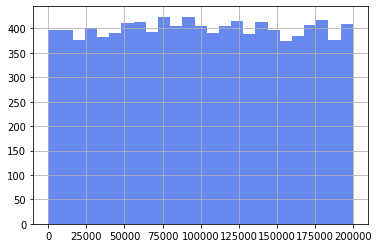

In [ ]:
# оценим визуально распределение
df['estimated_salary'].hist(bins=25)
plt.show()

Уже очевидно, что распределение зп крайне далеко от нормального, и все сэмплы из общей выборки будут такими же. Но докажем это:

* H0: выборка имеет гауссово (нормальное) распределение
* H1: выборка не имеет гауссовского (нормального) распределения

In [ ]:
# тест на нормальность  Шапиро-Вилка

from scipy.stats import shapiro

# пользуются 1 продуктом
sample_1 = df.query('products == 1')['estimated_salary']
# пользуются 2 продуктами
sample_2 = df.query('products == 2')['estimated_salary']
# не используют кредитную карту
sample_3 = df.query('creditcard == 0')['estimated_salary']
# используют кредитную карту
sample_4 = df.query('creditcard == 1')['estimated_salary'] 

sample = df['estimated_salary']
for data in [sample, sample_1, sample_2, sample_3, sample_4]:

    stat, p = shapiro(data)
    print('Статистика = %.3f, p = %.5f' % (stat, p))

    alpha = 0.05 # критический уровень статистической значимости
    if p > alpha:
        print('Выборка имеет гауссово (нормальное) распределение, не удалось отвергнуть нулевую гипотезу')
    else:
        print('Отвергаем нулевую гипотезу: распределение ненормально')

Статистика = 0.957, p = 0.00000
Отвергаем нулевую гипотезу: распределение ненормально
Статистика = 0.957, p = 0.00000
Отвергаем нулевую гипотезу: распределение ненормально
Статистика = 0.955, p = 0.00000
Отвергаем нулевую гипотезу: распределение ненормально
Статистика = 0.957, p = 0.00000
Отвергаем нулевую гипотезу: распределение ненормально
Статистика = 0.957, p = 0.00000
Отвергаем нулевую гипотезу: распределение ненормально


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



**Поскольку распределение данных о заработной плате ненормально, то для проверки гипотез применяем критерий Манна-Уитни.**

* Н0: нет различий между распределениями выборок заработных плат клиентов, пользующихся 1 и 2 продуктом
* Н1: есть различия между распределениями выборок заработных плат клиентов, пользующихся 1 и 2 продуктом

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(sample_1, sample_2)
print('Статистика = %.3f, p = %.3f' % (stat, p))

if p > alpha:
    print('Различий в выборках заработных плат клиентов, пользующихся 1 и 2 продуктом, нет. Нулевая гипотеза верна')
else:
    print('Отвергаем нулевую гипотезу, \
    есть различия между распределениями выборок заработных плат клиентов, пользующихся 1 и 2 продуктом')

Статистика = 11554276.000, p = 0.204
Различий в выборках заработных плат клиентов, пользующихся 1 и 2 продуктом, нет. Нулевая гипотеза верна


* Н0: нет различий между распределениями выборок заработных плат клиентов, использующих и не использующих кредитную карту
* Н1: есть различия между распределениями выборок заработных плат клиентов, использующих и не использующих кредитную карту

In [ ]:
stat, p = mannwhitneyu(sample_3, sample_4)
print('Статистика = %.3f, p = %.3f' % (stat, p))

if p > alpha:
    print('Различий в выборках заработных плат клиентов, использующих и не использующих кредитную карту, нет. Нулевая гипотеза верна')
else:
    print('Отвергаем нулевую гипотезу, \
    есть различия между распределениями выборок заработных плат клиентов, использующих и не использующих кредитную карту')

Статистика = 10256366.000, p = 0.158
Различий в выборках заработных плат клиентов, использующих и не использующих кредитную карту, нет. Нулевая гипотеза верна


## Общие выводы

В датасете содержится информация о 10 000 уникальных клиентах банка, проживающих в Ярославле, Рыбинске, Ростове Великом. 

*	Возраст клиентов варьируется от 18 до 92 лет, среднее - 39, 
*	Количество объектов в собственности: от 0 до 10, в среднем - 5, 
*	Баланс на счёте: от 3 768.7 до 250 898.1 руб, среднее - 119 827.5 руб,
*	Заработная плата клиента (оценивается алгоритмом): от 11.58 до 199 992 руб, 
*	Количество продуктов, которыми пользуется клиент: от 1 до 4, в среднем - 1,
*	В 71% случаев клиент имеет кредитную карты банка,
*	В  51.5% случаев клиент активен, 
*	средний показатель оттока - 20.4%

Типы данных соответствуют описанию переменных, дубликатов в датасете нет.
Пропуски имеются в данных о балансе на счете (balance) в количестве 3617 значений. Заполнение не будет проводиться, т.к. может привести к значительному искажению данных.

**География распространения**

Половина клиентов исследуемой выборки проживают в Ярославле. Примерно в равных пропорциях (по 25%) распределено между Рыбинском и Ростовом Великим. Однако, если учитывать численность этих городов, чаще всего клиентами банка становятся в Ростове (8,25% от численности населения), в то время как в Рыбинске и Ярославле доля клиентов среди населения невелика: 1.36% и 0.83%, соответственно.

Активность клиентов во всех городах соизмерима и колеблется в районе 50%: в Рыбинске - 53%, в Ярославле - 51.7%, в Ростове Великом - 49.7%.
Отток клиентов больше всего наблюдается в Ростове (32,4%), в то время как Рыбинске и Ярославле показатели ниже в 2 раза: 16.7% и 16.2%, соответственно.

Предположения и рекомендации:

*	половина клиентов банка не являются активными пользователями продуктов, что может привести к их потере (оттоку), если с ними не работать.  возможное решение - направить пуш-уведомление о новостях/ предложениях и акциях банка/ скидках от партнеров и тд
*	высокая доля распространения в Ростове может быть обусловлена использованием продукта или специального предложения банка, актуального для данного города. Например, это может быть зарплатный проект градообразующего предприятия или маркетинговая акция "приведи друга". При этом, доля оттока выше в два раза, чем в Рыбинске или Ярославле. Стоит проработать вопрос удержания клиентов. Проверить, связан ли отток с окончанием спец.предложения или периодом льготного обслуживания - в качестве решения можно предложить клиентам особые условия для продолжения сотрудничества. Либо провести пользовательское исследование по сбору обратной связи о причинах ухода

**«Портреты» клиентов**

1.	возраст

По большей части клиенты банка - это люди молодого и среднего возраста - теоретически, это активное работающее население. На долю клиентов от 25 до 40 лет приходится 55.3%, от 40 до 65 лет - 37.3%.
Наименее охваченные сегменты:
•	клиенты студенческого возраста (от 18 до 25) - 435 (4.4%)
•	клиенты пенсионного возраста (старше 65 лет) - 282 (2.8%)

2.	активность и отток 

Люди молодого возраста (до 40 лет) чаще пользуются несколькими продуктами банка (медианное значение = 2), а среднего и старшего - одним.

Активность клиентов в группах до 65 лет сопоставима (около 50%), а вот клиенты от 65 лет (неожиданно) стали самыми активными пользователями - 86.5%. Если причина в особых условиях обслуживания пенсионеров, то акцию можно считать успешной.

Отток клиентов минимален для клиентов студенческого (8.7%) и молодого возраста до 40 лет (10%). Максимальный показатель в группе от 40 до 65 - 37.4%. На эту категорию клиентов необходимо обратить особое внимание. Провести интервью, выявить зоны недовольства банком и причины ухода. Доля оттока в сегменте 65+ относительно небольшая - 15.2%.

Согласно корреляционной матрице, на отток влияет (слабо) только возраст клиентов. Остальные признаки не коррелируют между собой

3.	Показатели дохода

Баланс на счете во всех возрастных группах достаточно высок - около 120 тыс.руб. Для распределения значений баланса на счете для групп 25-39, 40-64 (они же - наиболее многочисленные) наблюдаются выбросы как в меньшую, так и в большую стороны. Таким клиентам можно предлагать либо кредитные программы, либо инвестиционные, соответственно.

Рассчитанное значение заработной платы выше всего в категории клиентов 18-25 лет (106 663 руб). При этом распределения во всех возрастных категориях очень равномерное и находится в одном диапазоне приблизительно от 0 до 200 тыс.руб

*	использование кредитной карты

Большая часть клиентов (71%) имеют кредитные карты. Распределение между полами соизмеримо, однако, мужчины используют кредитные средства чуть чаще (39% против 32%).

Не выявлено значимых различий и аномалий в распределении признаков (зп, баланс, возраст, баллы кредитного скоринга) в зависимости от наличия кредитной карты ни у мужчин, ни у женщин. Поэтому, можно говорить о том, что уровень заработной платы не влияет на решение клиента использовать кредитную карту: предложение о кредитной карте в равной степени может быть интересно для всех групп клиентов.

Показатели оттока и активности клиентов также не зависят от наличия кредитной карты или пола клиента.

Рекомендации:
*	разработать продукты для охвата потенциальных клиентов до 18 лет (детские карты, доп.карты к счетам родителей и тп)
*	разработать программы для студентов и пенсионеров. Сейчас доля этих возрастных категорий в общем портфеле очень мала, при этом лояльность этих категорий велика - это потенциальная точка роста.
*	разработать премиальные программы: среднее значение баланса на счете во всех категориях одинакова. При этом отток среди клиентов 40-64 лет высок (37.4%) - возможно, этой категории людей становятся не интересны стандартные продукты и подходы банка.
*	в зависимости от баланса на счете и активности клиента можно предлагать кредитные или инвестиционные продукты

4.	Сегментация по количеству потребляемых продуктов

* Сегменты клиентов, использующих 1 или 2 продукта. 

Распределение между сегментами сопоставимо, однако, во всех исследуемых городах одним продуктом пользуются чуть чаще, чем двумя: 50.8% приходится на 1 сегмент, 45.9% - на 2. 
В целом, распределение клиентов в сегментах пропорционально общему количеству клиентов в городах. 

* Сегменты клиентов, использующих 3 или 4 продукта. 

Доли сегментов составляют 2.7% и 0.6%, соответственно.
Количество клиентов, в портфеле которых есть 3 или 4 продукта банка в Ростове Великом и Ярославле сопоставимо, несмотря на то, что общее количество клиентов в Ярославле в 2 раза больше. Это может говорить о принадлежности клиентов к одному экономическому классу (что нивелирует географический признак).

Можно отметить, что 3 и 4 продуктами пользуются клиенты более старшего возраста (медиана - 42 и 45 лет, соответственно)

Значимых различий в доходах между сегментами не наблюдается. Различий в пользовательском поведении между мужчинами и женщинами, а также в разрезе возрастных групп - нет.

Медианные значения показателей дохода и надежности (зп, баланс на счете, баллы кредитного скоринга), как и разброс данных, отличаются незначительно.

Самые многочисленные сегменты, 1 и 2, при этом самые надежные: вероятность оттока 27.7% и 7.6%, соответственно. Учитывая сопоставимость абсолютных показателей объемов сегментов, рекомендуется активнее предлагать второй продукт клиентам - так вероятность оттока снижается почти в 4 раза.
82.7% клиентов 3 сегмента покинули банк, а из 4 сегмента "ушли" в 100% случаев. Возможно, учитывая небольшую выборку, это является статистической погрешностью. Либо стоит провести аудит условий для данных сегментов, сравнить с условиями конкурентов.


**Проверка гипотез:**

Подтверждено, что различий показателей заработных плат 1 и 2 сегмента нет. 

Уровень заработной платы не влияет на факт использования кредитной карты: различий в выборках нет.

